In [26]:
import pandas as pd
import numpy as np 
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

df = pd.read_csv("student-mat.csv", sep=";")
# df['school'] = 
# df['sex'] = df['sex'].replace(['F'], 1)
# df['sex'] = df['sex'].replace(['M'], 0)
df.head()



,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [32]:
#df = df[["G1", "G2", "G3", "studytime", "failures", "absences"]]
df = df[["school","sex", "age", "address","famsize", "Pstatus", "Medu", "Fedu", "traveltime","studytime", "failures", "schoolsup", "famsup", "paid", "activities","nursery","higher", "internet", "romantic", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "absences", "G1", "G2", "G3"]]
print(df.head())

binaryAttr = ["school", "sex", "address", "famsize","Pstatus","schoolsup","famsup","paid","activities","nursery","higher","internet","romantic"]
binaryAttrVals = [['GP','MS'],['F','M'],['U','R'],['LE3','GT3'],['T','A'],['yes','no'],['yes','no'],['yes','no'],['yes','no'],['yes','no'],['yes','no'],['yes','no'],['yes','no'],]

#initialize everything to (0/1)
for i in range(len(binaryAttr)):
    df[binaryAttr[i]] = df[binaryAttr[i]].replace([binaryAttrVals[i][0]], 0)
    df[binaryAttr[i]] = df[binaryAttr[i]].replace([binaryAttrVals[i][1]], 1)
print(df.head())

predict = "G3"

X = np.array(df.drop([predict], 1)) # Features
y = np.array(df[predict]) # Labels
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

  school sex  age address famsize Pstatus  Medu  Fedu  traveltime  studytime  \
0      0   0   18       0     GT3       A     4     4           2          2   
1      0   0   17       0     GT3       0     1     1           1          2   
2      0   0   15       0       0       0     1     1           1          2   
3      0   0   15       0     GT3       0     4     2           1          3   
4      0   0   16       0     GT3       0     3     3           1          2   

   ...  famrel freetime goout Dalc Walc health absences  G1  G2  G3  
0  ...       4        3     4    1    1      3        6   5   6   6  
1  ...       5        3     3    1    1      3        4   5   5   6  
2  ...       4        3     2    2    3      3       10   7   8  10  
3  ...       3        2     2    1    1      5        2  15  14  15  
4  ...       4        3     2    1    2      5        4   6  10  10  

[5 rows x 29 columns]
   school  sex  age  address  famsize  Pstatus  Medu  Fedu  traveltime  \
0 

In [11]:
best = 0
for _ in range(100):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Acurracy:", acc)

    if acc > best:
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)
print('Best: \n', best)
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

print('Coefficients: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

predictions = linear.predict(x_test)

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

Acurracy: 0.7619173163599008
Acurracy: 0.7959438706966304
Acurracy: 0.7907513338619045
Acurracy: 0.8390570073211048
Acurracy: 0.7797592582316599
Acurracy: 0.7825324601226668
Acurracy: 0.8156059599288397
Acurracy: 0.7321047861900741
Acurracy: 0.7716334594597896
Acurracy: 0.866674001282273
Acurracy: 0.7273826365791651
Acurracy: 0.8367703586404398
Acurracy: 0.8789959163035538
Acurracy: 0.8066818209837076
Acurracy: 0.83494132908791
Acurracy: 0.8170973027755047
Acurracy: 0.8716087693880783
Acurracy: 0.8868874027990736
Acurracy: 0.8822184328385665
Acurracy: 0.7086271648671445
Acurracy: 0.7587434796777084
Acurracy: 0.805866328850567
Acurracy: 0.8186939901338937
Acurracy: 0.8343535097564977
Acurracy: 0.9288112819090116
Acurracy: 0.81464149101537
Acurracy: 0.7088678597819899
Acurracy: 0.8145537382185499
Acurracy: 0.8597802809328472
Acurracy: 0.7455151936431876
Acurracy: 0.7623988137708861
Acurracy: 0.8294116183908875
Acurracy: 0.7516104747533799
Acurracy: 0.8946598865393555
Acurracy: 0.72063409

No handles with labels found to put in legend.


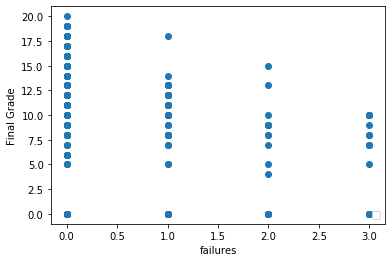

In [7]:
plot = "failures" # Change this to G1, G2, studytime or absences to see other graphs
plt.scatter(df[plot], df["G3"]) 
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()